In [21]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
LANGUAGE = ['bn', 'de', 'en', 'es', 'fr', 'ja', 'ru', 'sw', 'te', 'th', 'zh']

In [7]:
save_path = 'Qwen2-0.5B_100_emb_toks.pkl'

with open(save_path, "rb") as f:
    loaded_emb_toks = pickle.load(f)
print(f"emb_toks loaded from {save_path}")

emb_toks loaded from Qwen2-0.5B_100_emb_toks.pkl


In [9]:
tsne = TSNE(n_components=2, random_state=42)
layer_down_dim = {}
for layer in range(len(loaded_emb_toks['bn']['sample_0'])):
    down_dim = {}
    for lan in LANGUAGE:
        # down_dim[lan]=[]
        lan_emb = loaded_emb_toks[lan]
        layer_sample = []
        for i in range(len(lan_emb)):
            layer_sample.append(lan_emb[f"sample_{i}"][layer])
        layer_sample = np.array(layer_sample)
        # print("layer_sample_count:",len(layer_sample),"ori_dimension:",len(layer_sample[0]))
        down_dim[lan] = tsne.fit_transform(layer_sample)
    layer_down_dim[f"{layer}"] = down_dim
    

In [12]:
save_path = f"downdim_{save_path}"

with open(save_path, "wb") as f:
    pickle.dump(layer_down_dim, f)
print(f"emb_toks saved to {save_path}")

emb_toks saved to downdim_Qwen2-0.5B_100_emb_toks.pkl


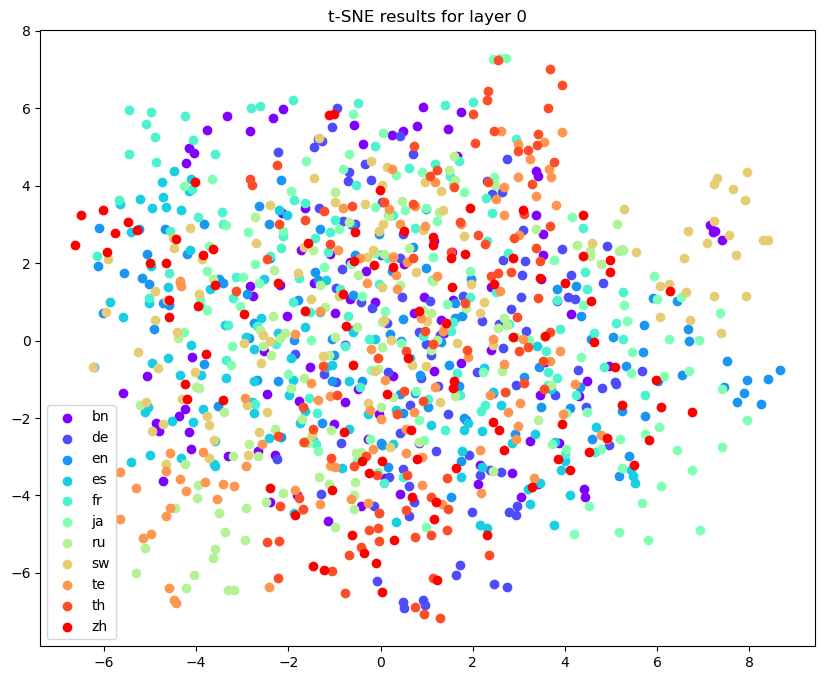

In [13]:
# 绘制第0层的不同语言的降维结果
layer = 0
colors = plt.cm.rainbow(np.linspace(0, 1, len(LANGUAGE)))

plt.figure(figsize=(10, 8))
for i, lan in enumerate(LANGUAGE):
    plt.scatter(layer_down_dim[str(layer)][lan][:, 0], layer_down_dim[str(layer)][lan][:, 1], color=colors[i], label=lan)

plt.title(f"t-SNE results for layer {layer}")
plt.legend()
plt.show()

In [33]:
import os
LANGUAGE = [  'en','ja', 'zh']

colors = plt.cm.rainbow(np.linspace(0, 1, len(LANGUAGE)))

# Find global min and max for x and y
all_x = []
all_y = []
for layer in range(24):
    for lan in LANGUAGE:
        all_x.extend(layer_down_dim[str(layer)][lan][:, 0])
        all_y.extend(layer_down_dim[str(layer)][lan][:, 1])

min_x, max_x = min(all_x), max(all_x)
min_y, max_y = min(all_y), max(all_y)

# Create a directory to save the plots
output_dir = f"{len(LANGUAGE)}_tsne_plots"
os.makedirs(output_dir, exist_ok=True)

# Draw eight pictures, each including 3 layers
layers_per_figure = 4
num_layers = 24
num_figures = num_layers // layers_per_figure

for fig_idx in range(num_figures):
    plt.figure(figsize=(15, 12))
    for plot_idx in range(layers_per_figure):
        layer = fig_idx * layers_per_figure + plot_idx
        plt.subplot(2, 2, plot_idx + 1)
        for i, lan in enumerate(LANGUAGE):
            plt.scatter(layer_down_dim[str(layer)][lan][:, 0], layer_down_dim[str(layer)][lan][:, 1], color=colors[i], label=lan)
        plt.xlim(min_x, max_x)
        plt.ylim(min_y, max_y)
        plt.title(f"t-SNE results for layer {layer}")
        plt.legend()
    plt.tight_layout()
    file_path = os.path.join(output_dir, f"tsne_layers_{fig_idx * layers_per_figure + 1}_to_{(fig_idx + 1) * layers_per_figure}.png")
    plt.savefig(file_path)
    plt.close()

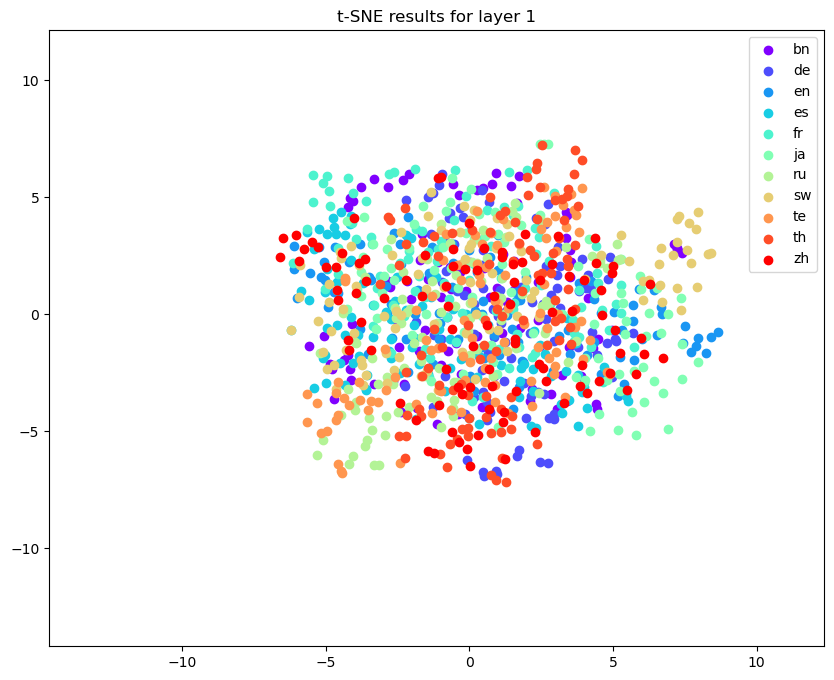

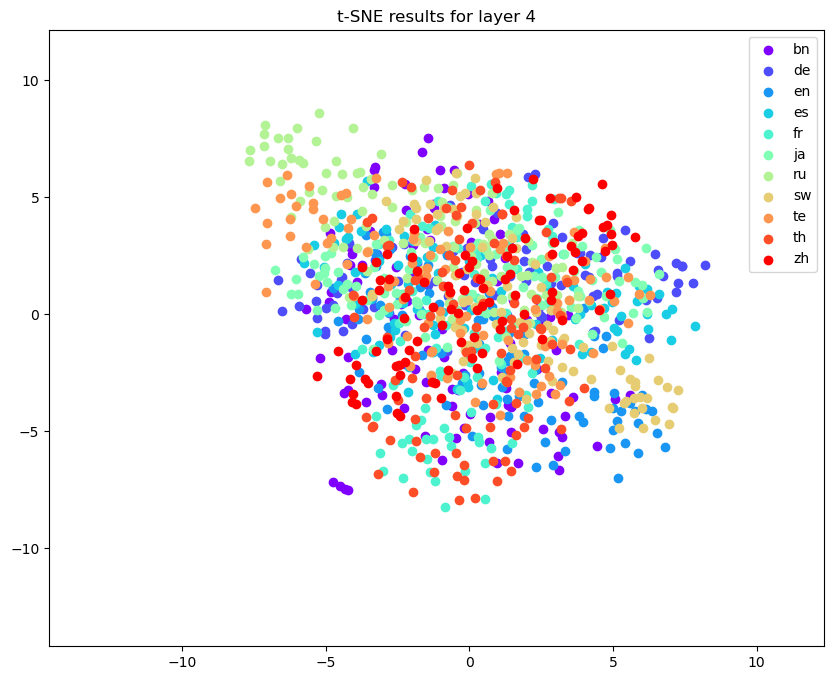

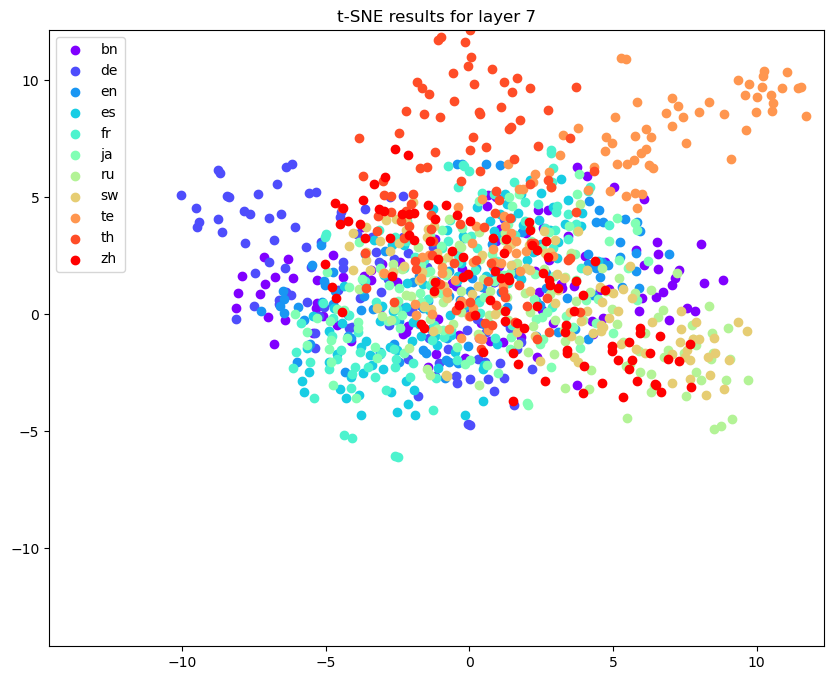

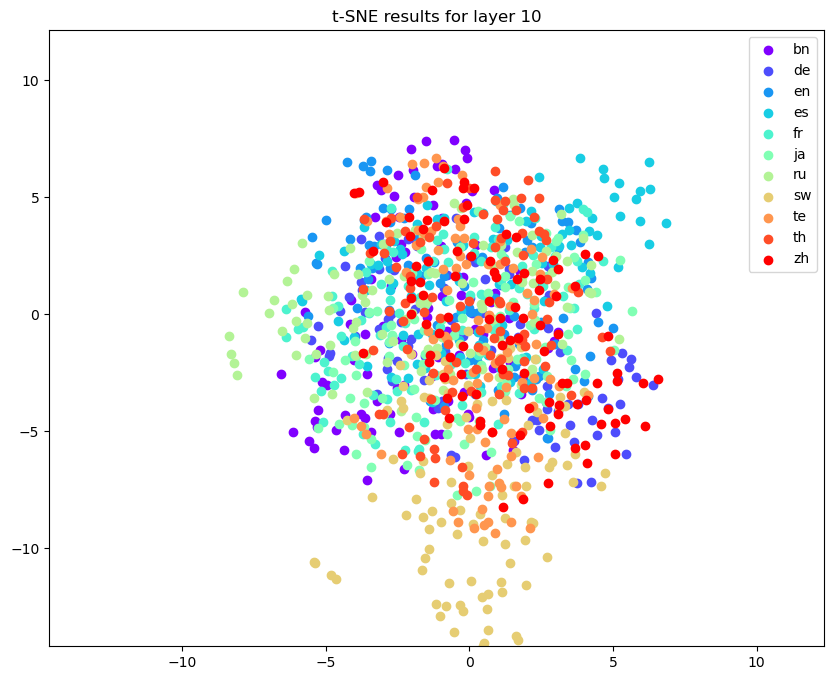

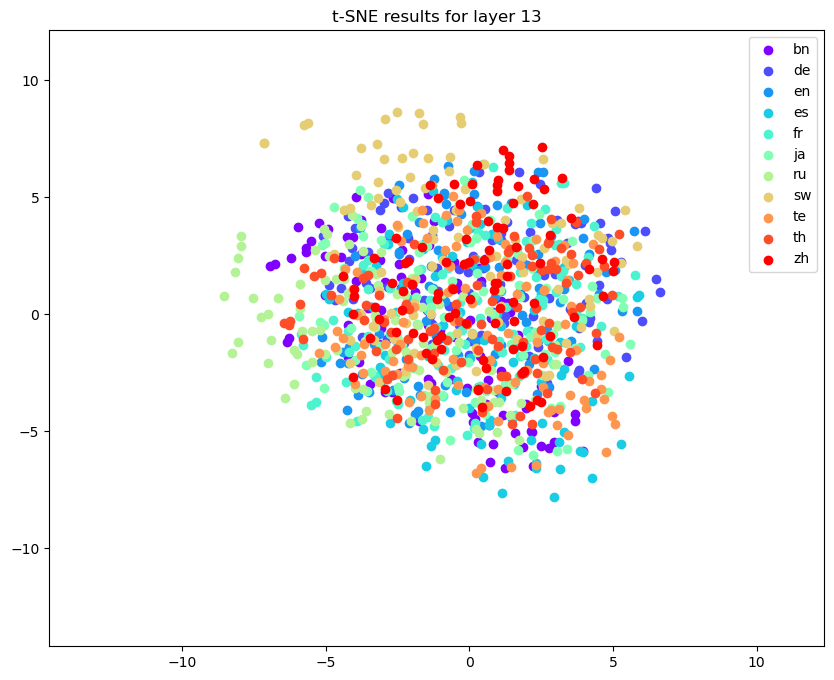

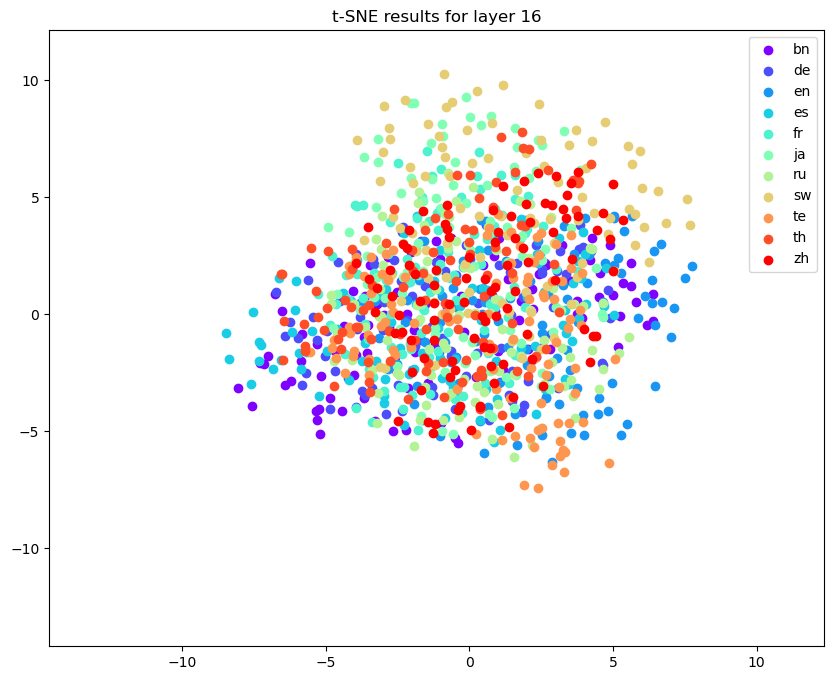

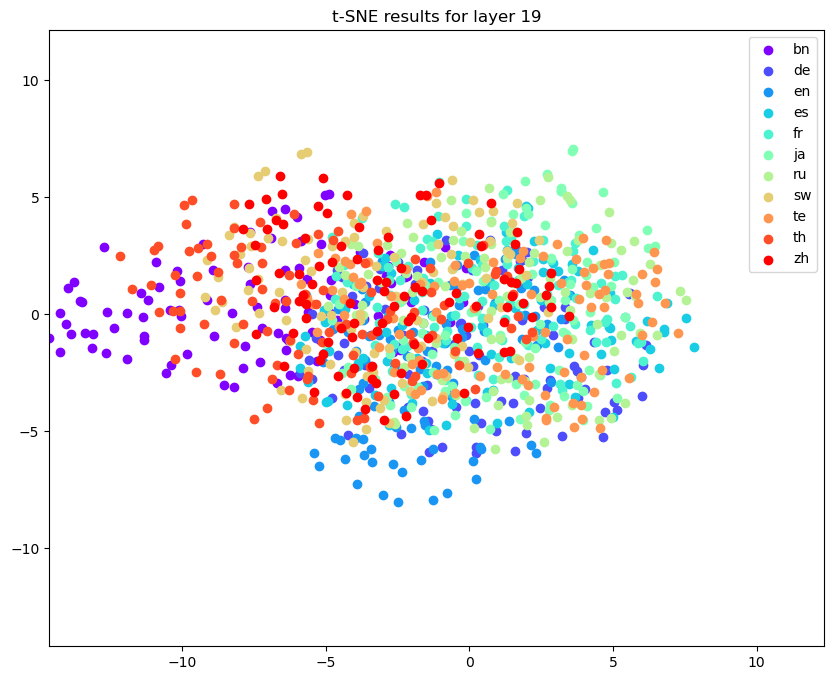

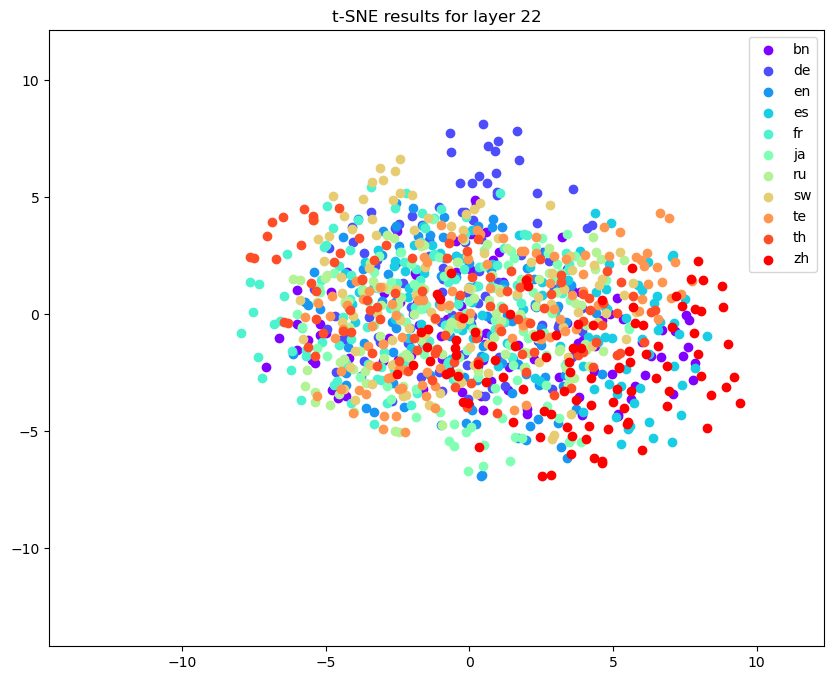

In [22]:

colors = plt.cm.rainbow(np.linspace(0, 1, len(LANGUAGE)))

# Find global min and max for x and y
all_x = []
all_y = []
for layer in range(24):
    for lan in LANGUAGE:
        all_x.extend(layer_down_dim[str(layer)][lan][:, 0])
        all_y.extend(layer_down_dim[str(layer)][lan][:, 1])

min_x, max_x = min(all_x), max(all_x)
min_y, max_y = min(all_y), max(all_y)

# Loop through each third layer and plot with fixed axis limits
for layer in range(0, 24, 3):
    plt.figure(figsize=(10, 8))
    for i, lan in enumerate(LANGUAGE):
        plt.scatter(layer_down_dim[str(layer)][lan][:, 0], layer_down_dim[str(layer)][lan][:, 1], color=colors[i], label=lan)
    plt.xlim(min_x, max_x)
    plt.ylim(min_y, max_y)
    plt.title(f"t-SNE results for layer {layer+1}")
    plt.legend()
    plt.show()


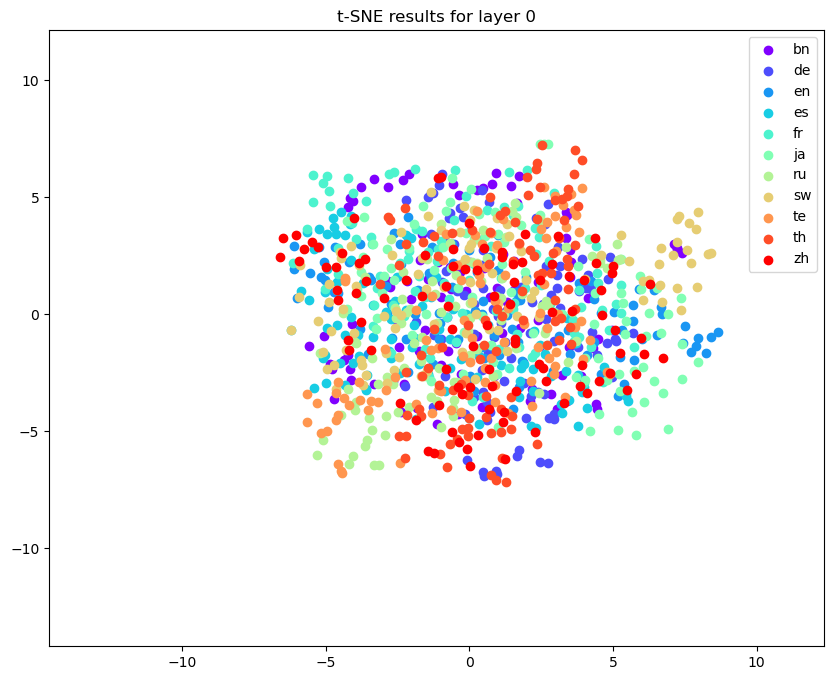

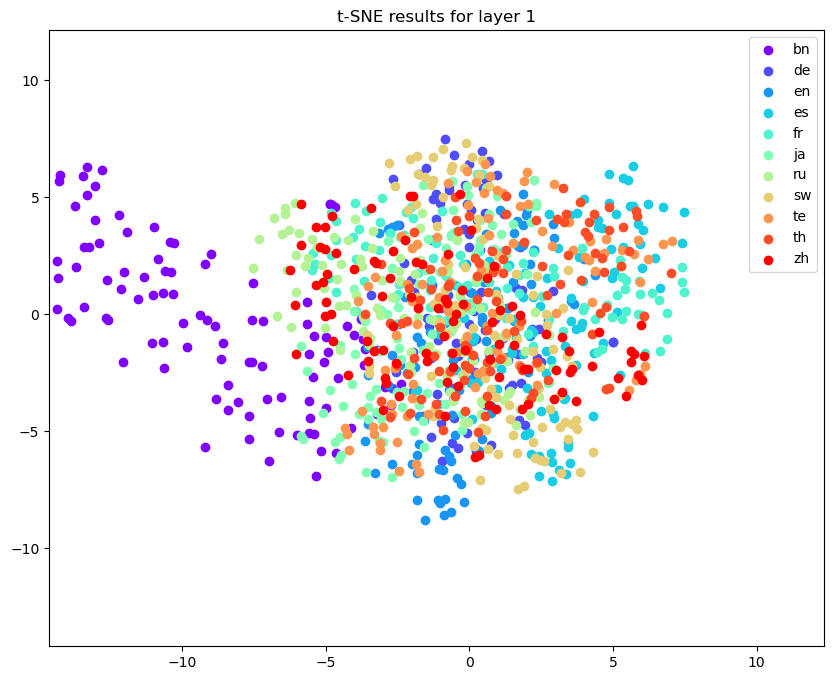

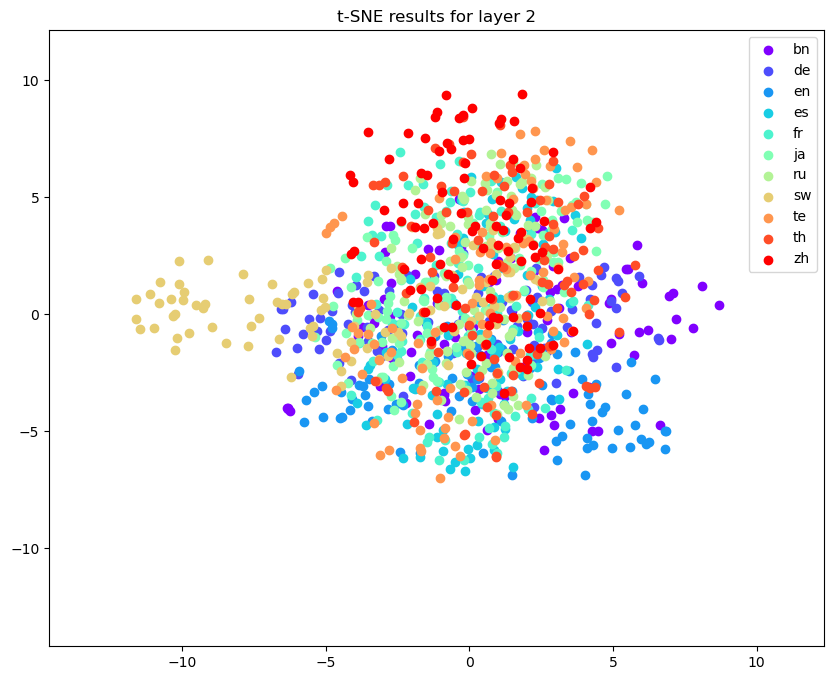

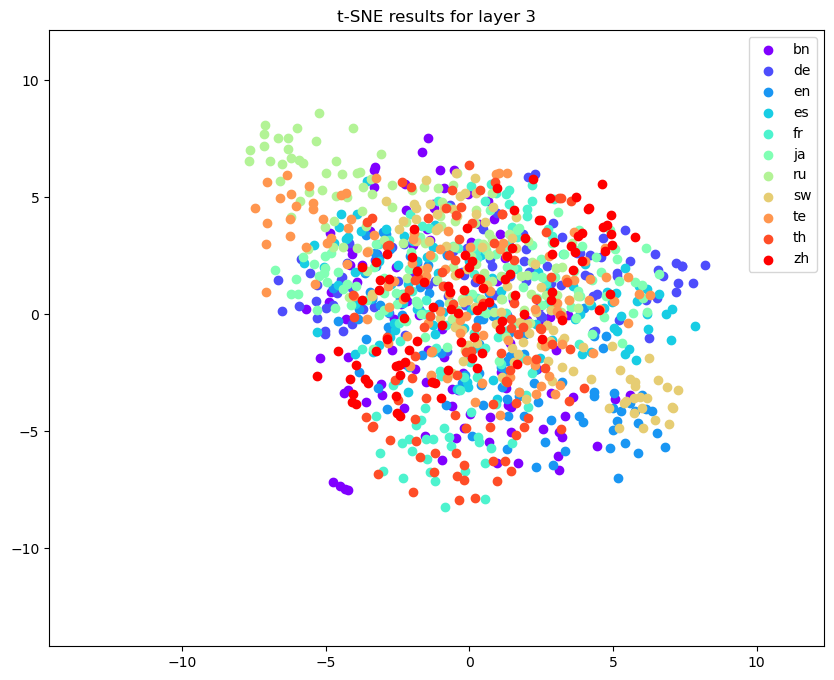

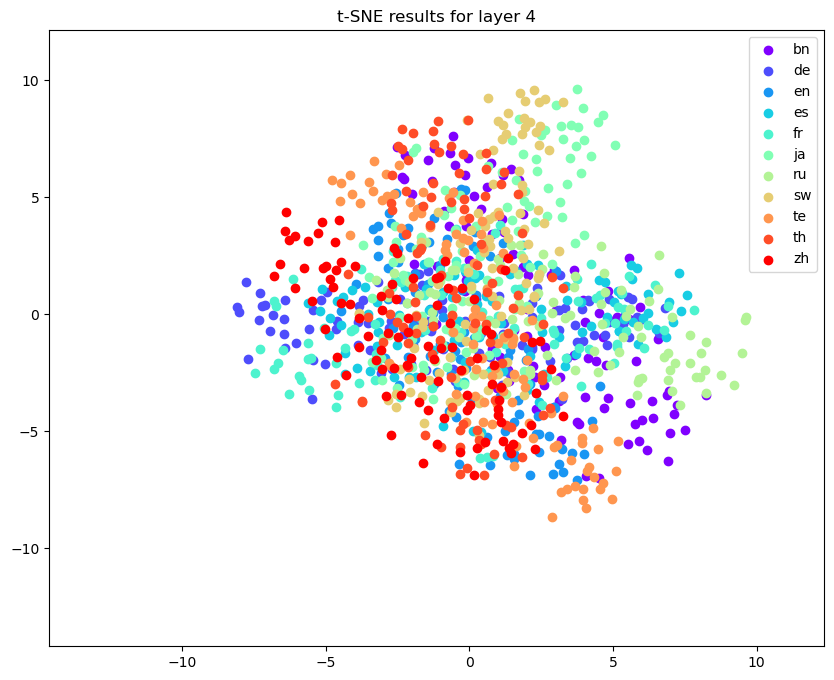

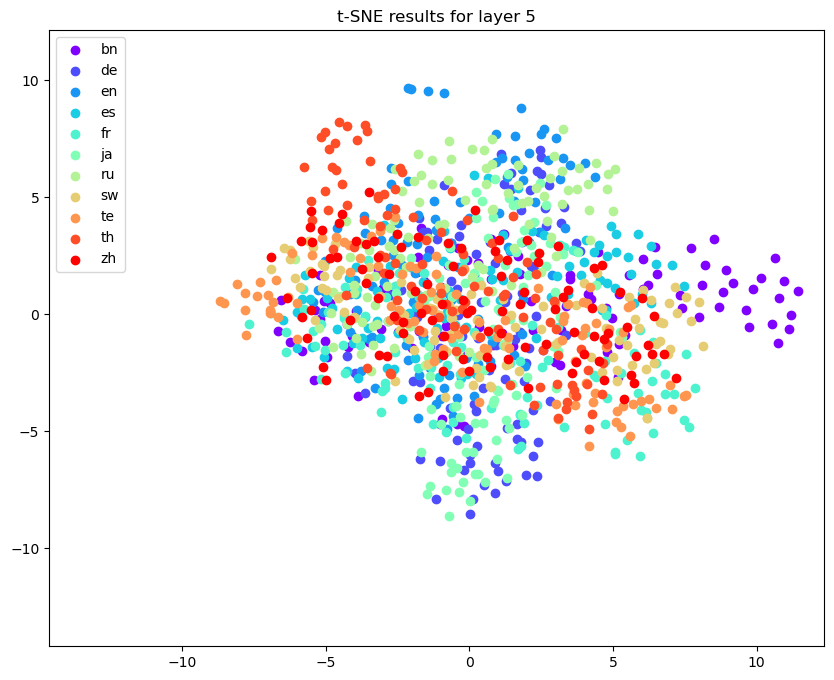

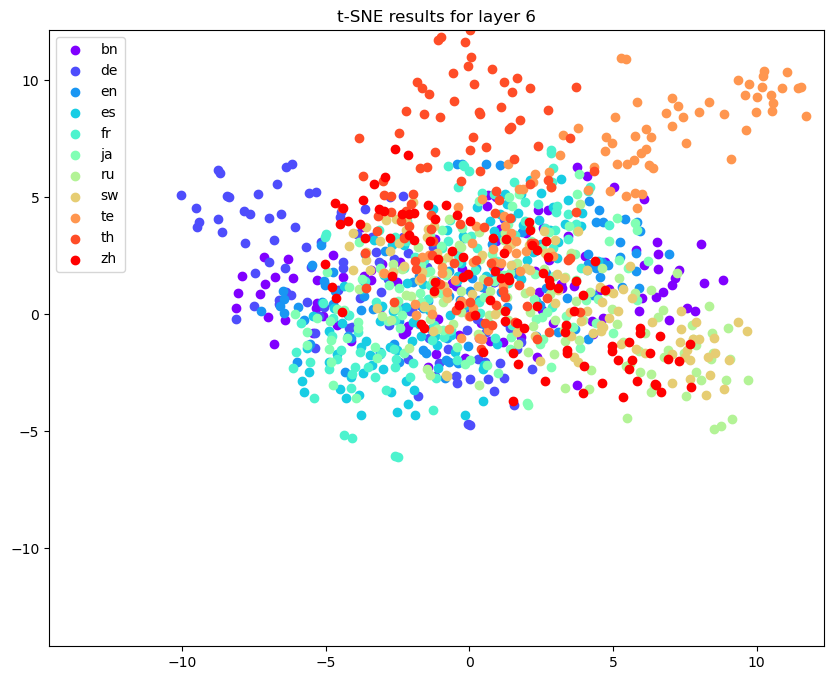

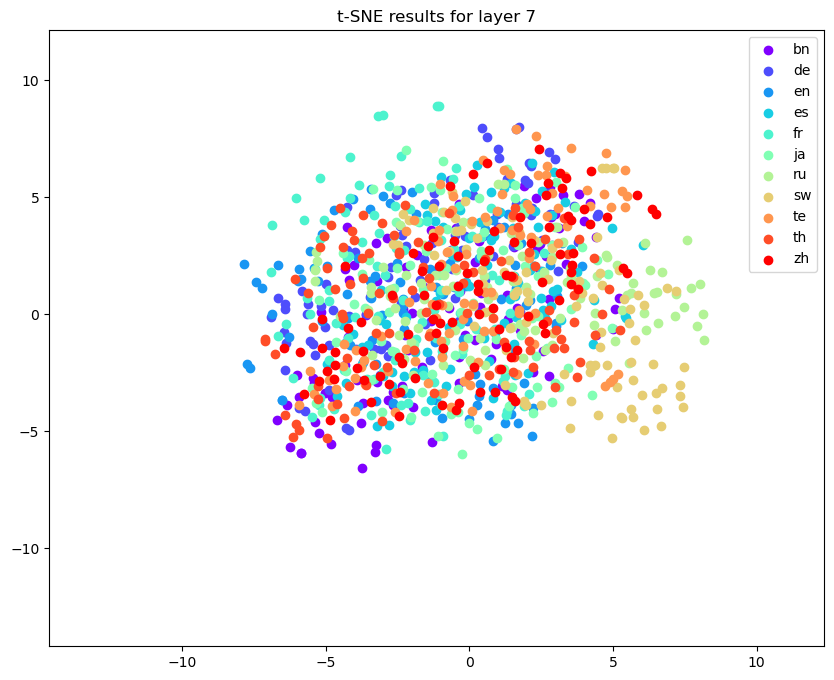

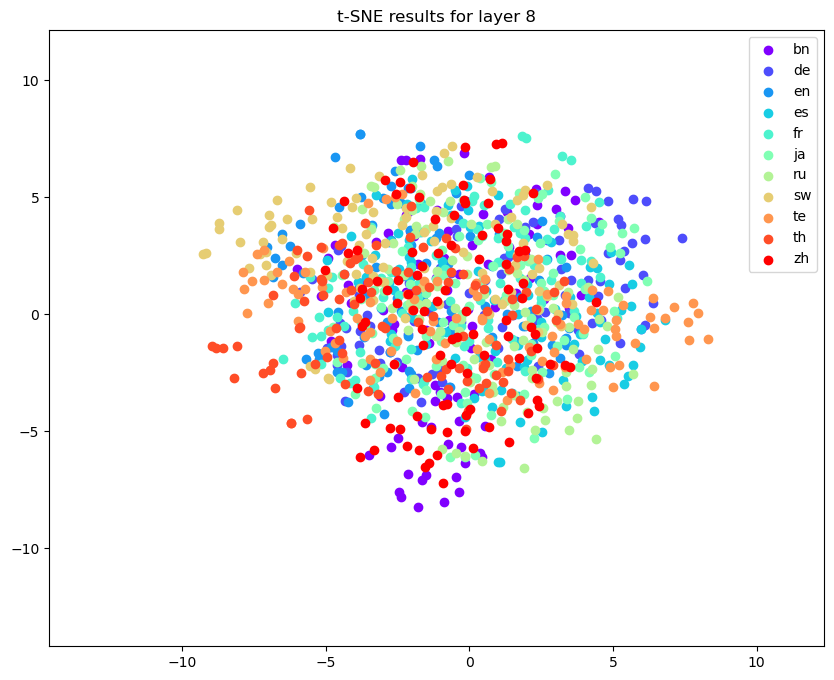

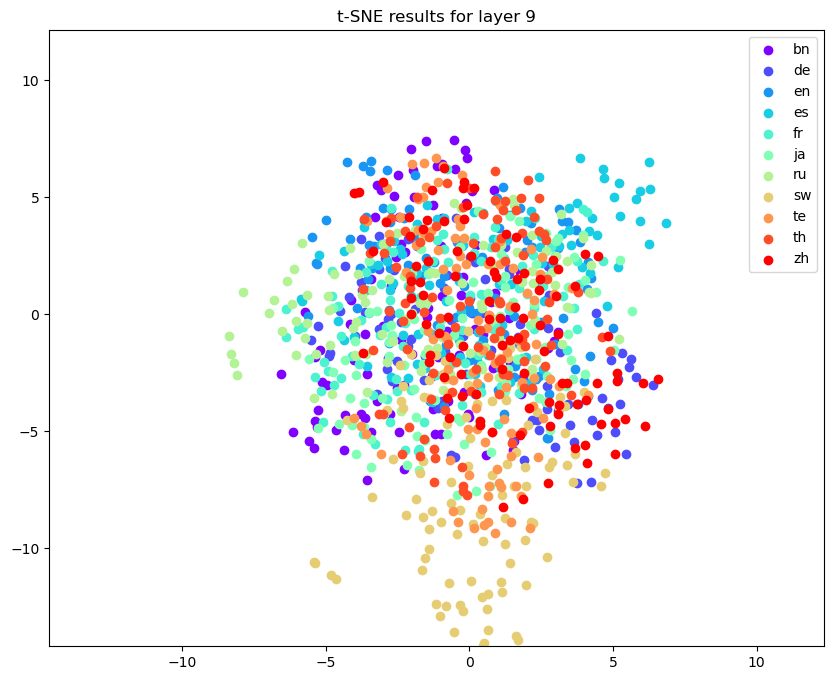

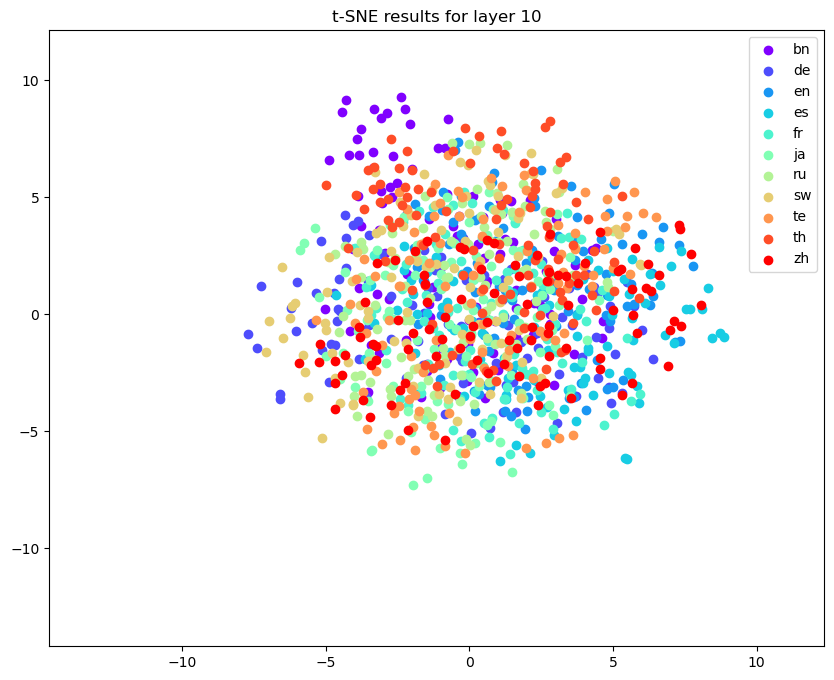

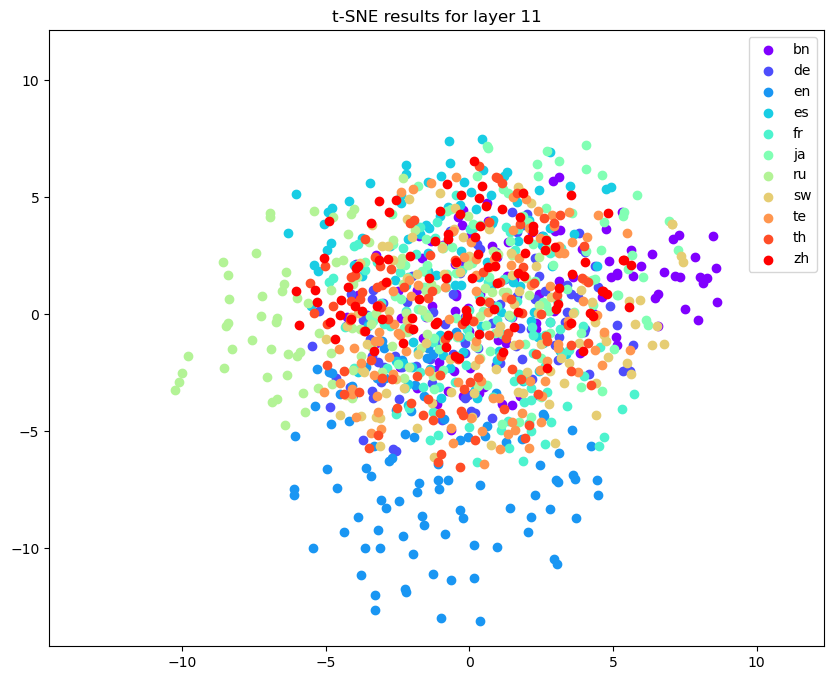

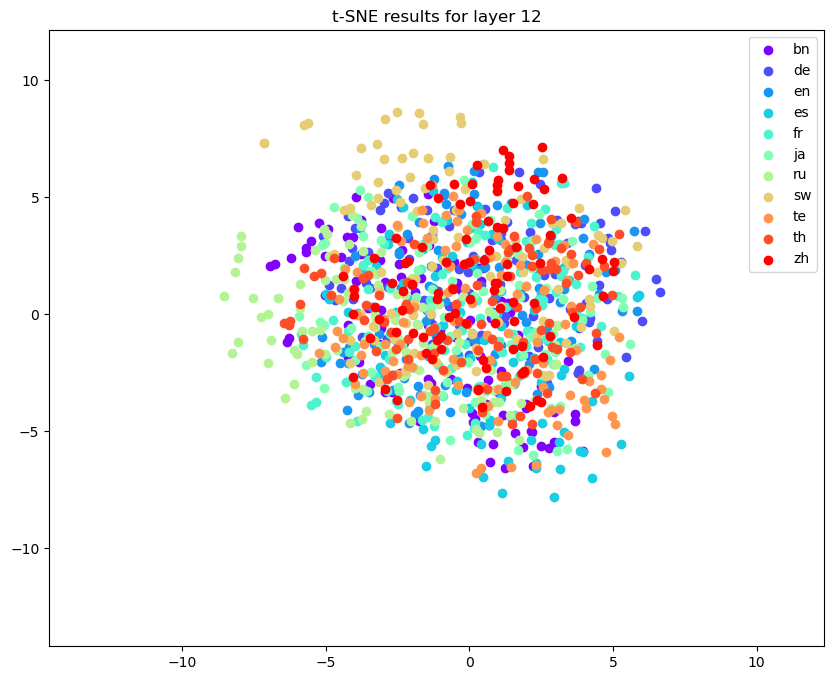

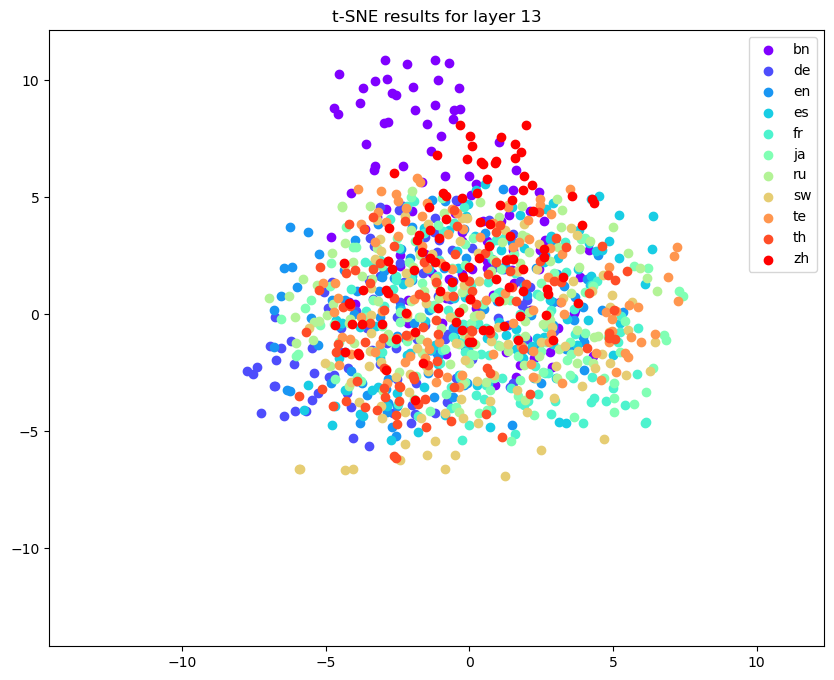

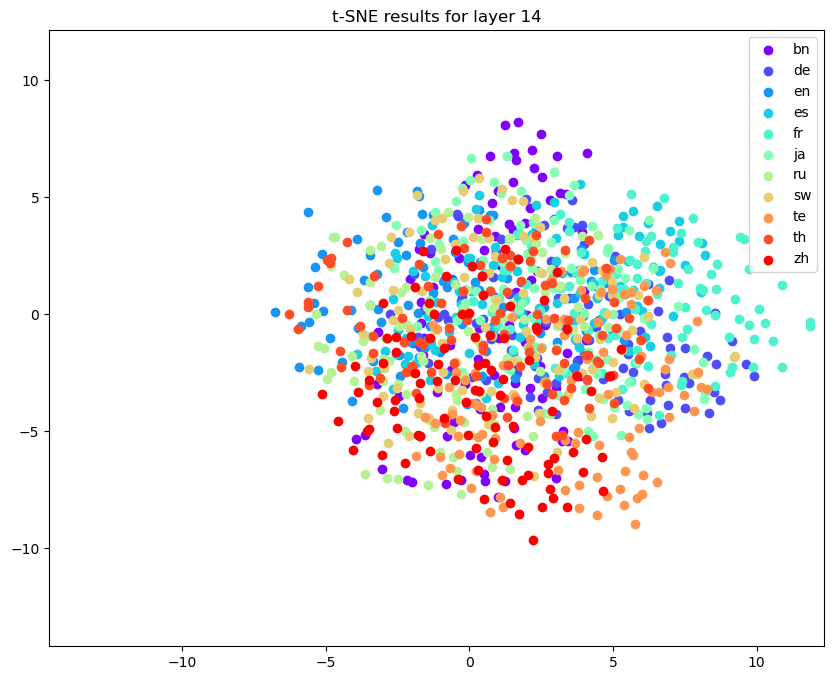

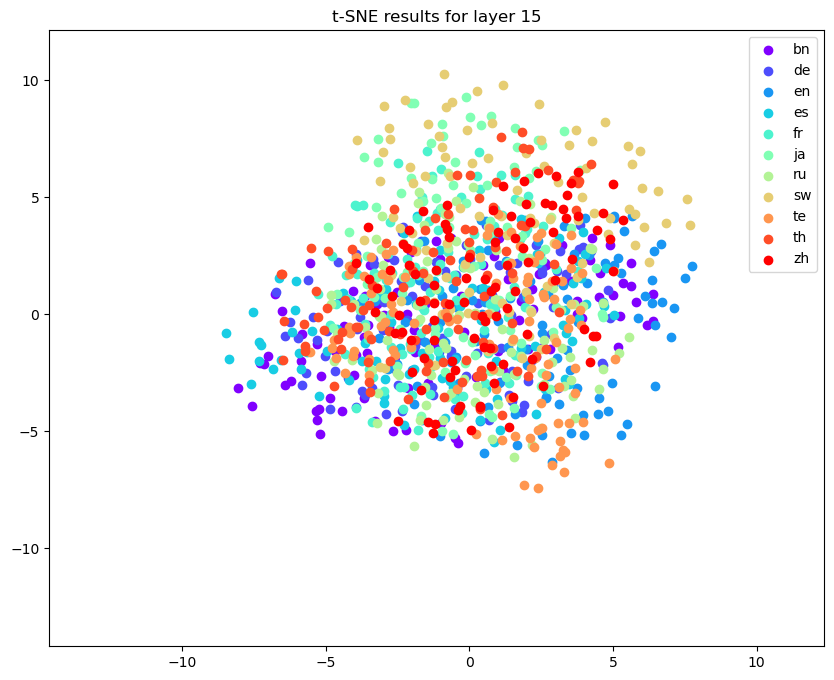

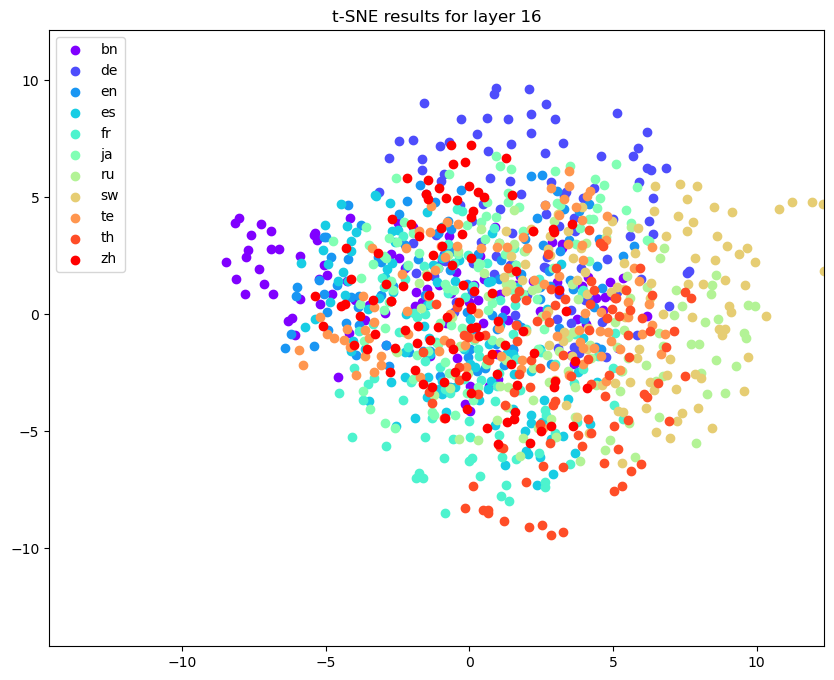

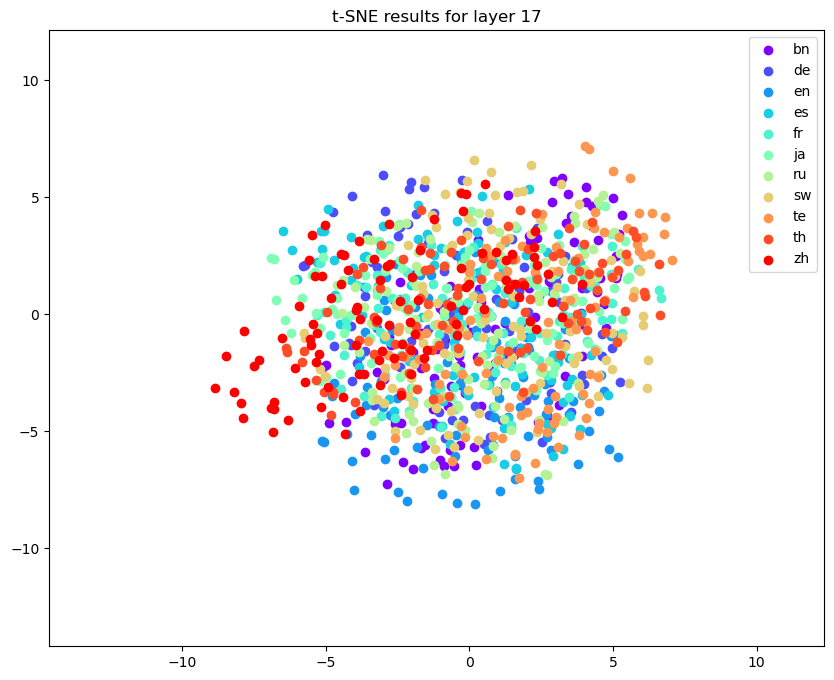

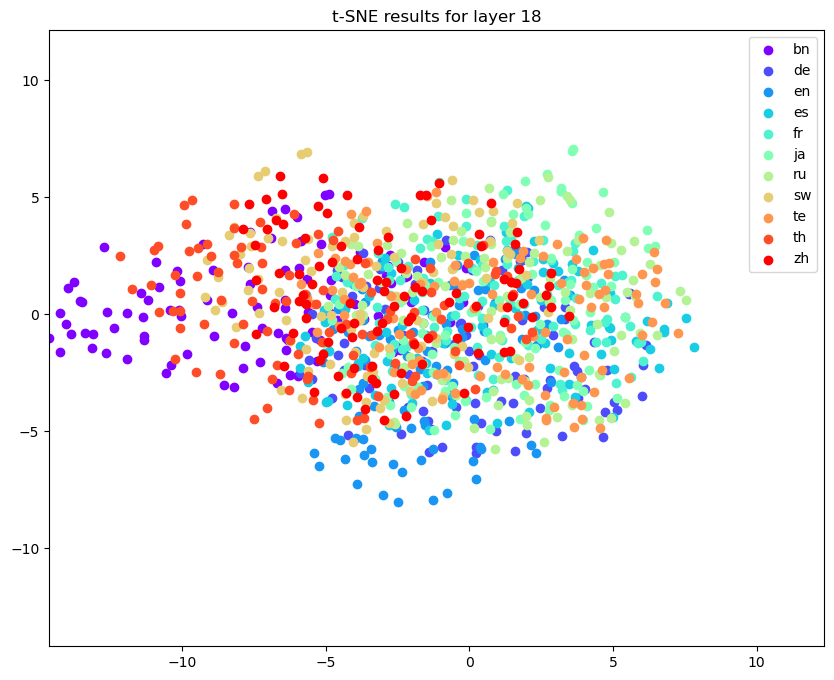

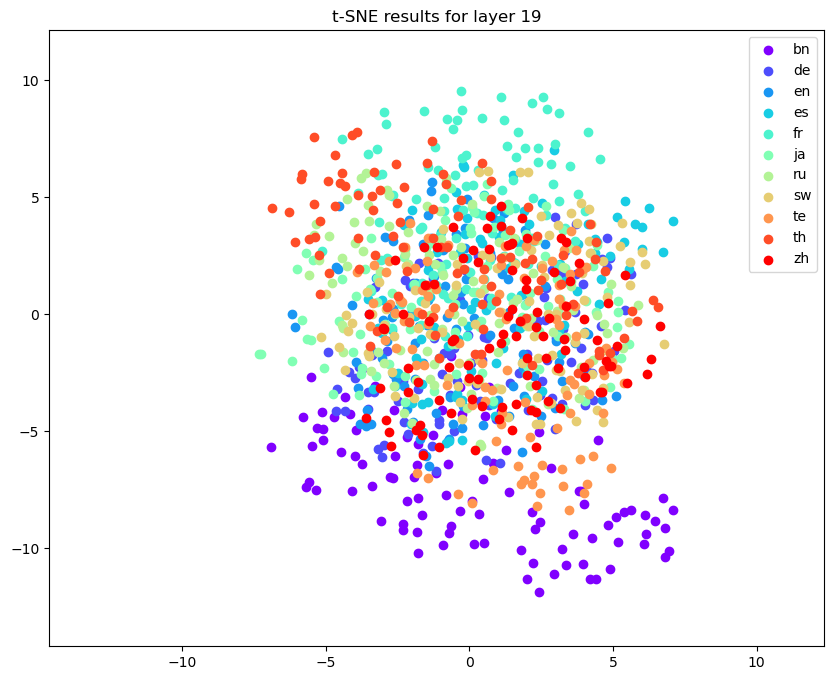

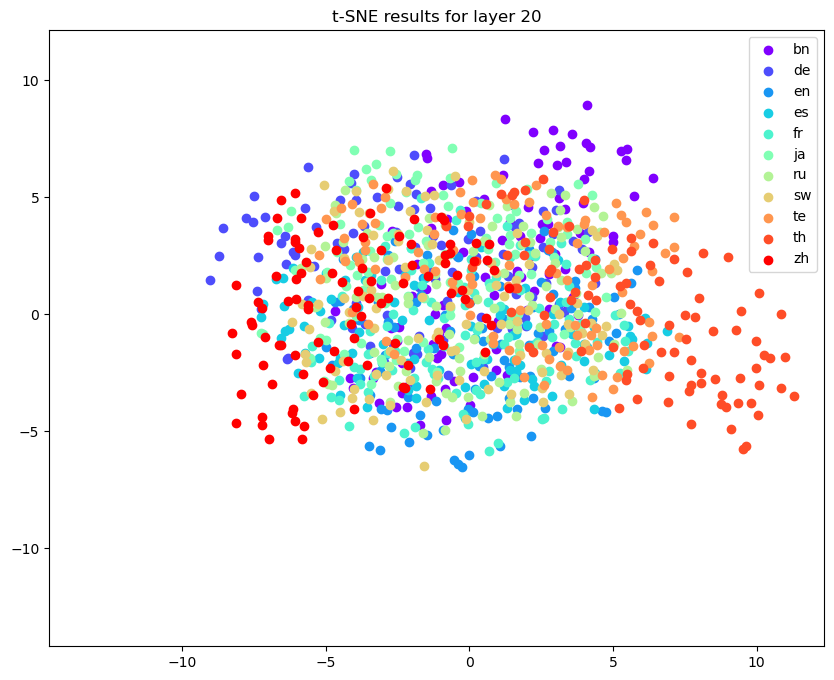

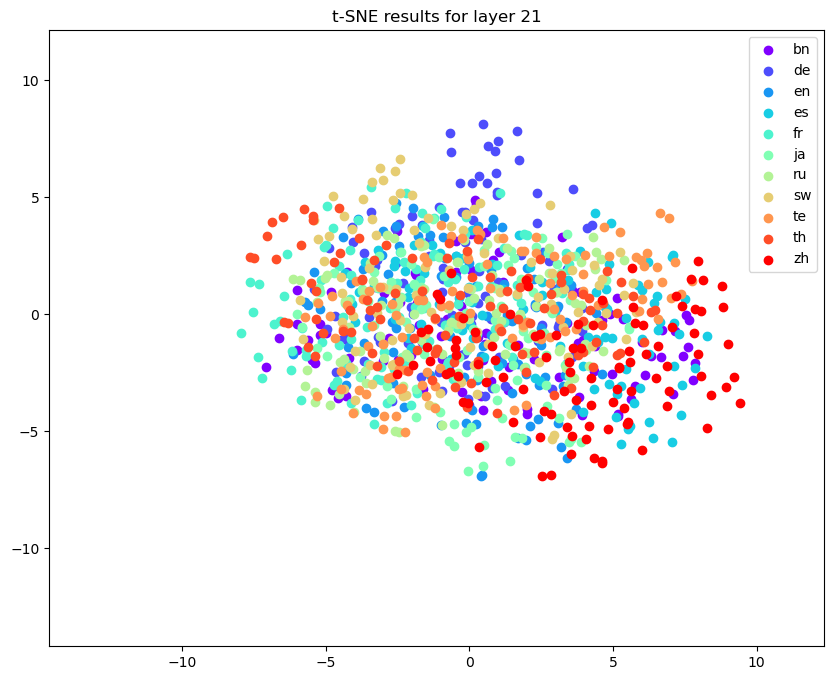

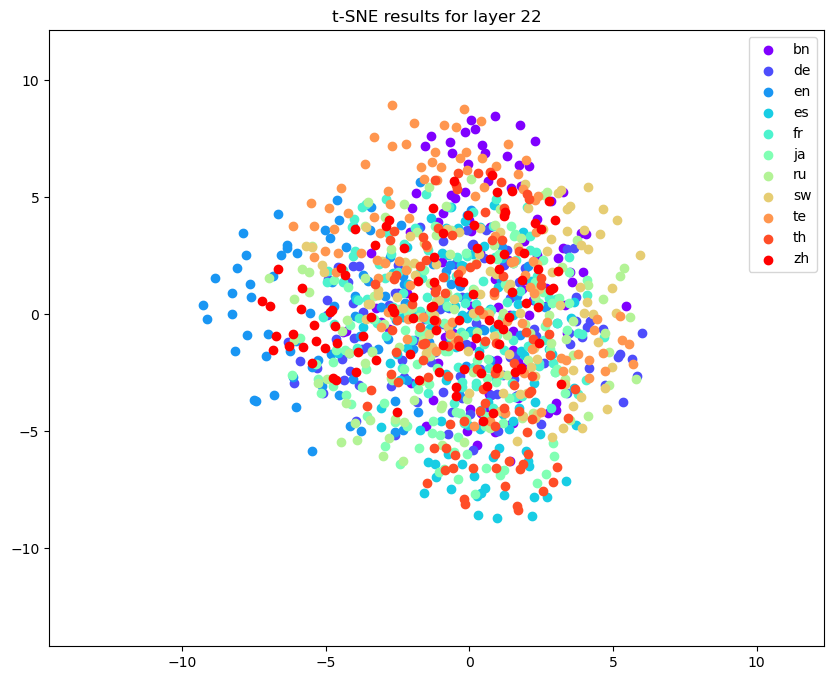

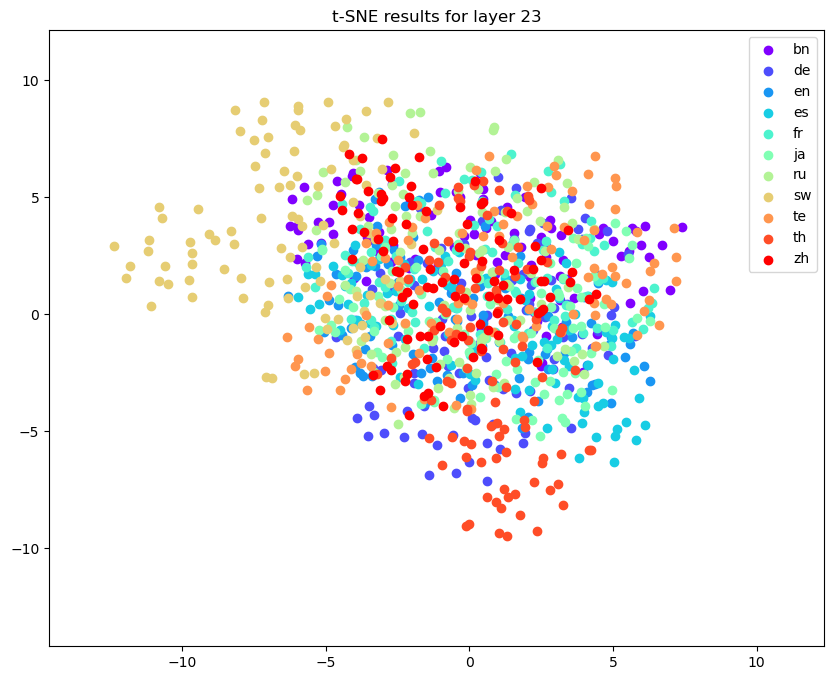

In [19]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(LANGUAGE)))

# Find global min and max for x and y
all_x = []
all_y = []
for layer in range(24):
    for lan in LANGUAGE:
        all_x.extend(layer_down_dim[str(layer)][lan][:, 0])
        all_y.extend(layer_down_dim[str(layer)][lan][:, 1])

min_x, max_x = min(all_x), max(all_x)
min_y, max_y = min(all_y), max(all_y)

# Loop through each layer from 0 to 23 and plot with fixed axis limits
for layer in range(24):
    plt.figure(figsize=(10, 8))
    for i, lan in enumerate(LANGUAGE):
        plt.scatter(layer_down_dim[str(layer)][lan][:, 0], layer_down_dim[str(layer)][lan][:, 1], color=colors[i], label=lan)
    plt.xlim(min_x, max_x)
    plt.ylim(min_y, max_y)
    plt.title(f"t-SNE results for layer {layer}")
    plt.legend()
    plt.show()